<b>Importing all the Libraries

In [37]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  

<b>Reading The Data 

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<b>Data Exploration

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.shape

(25, 2)

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Score obtained')

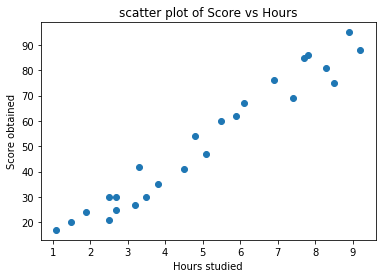

In [11]:
x=df.Hours
y=df.Scores
plt.scatter(x,y)
plt.title("scatter plot of Score vs Hours")
plt.xlabel("Hours studied")
plt.ylabel("Score obtained")

<b>Preparing The Data

In [12]:
x= df.iloc[:, :-1].values
y= df.iloc[:, 1].values

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

In [18]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

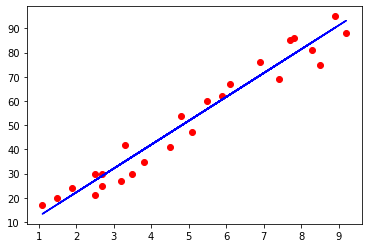

In [22]:
# Plotting the regression line
line = regr.coef_*x+regr.intercept_

# Plotting for the test data
plt.scatter(x, y, color = "red")
plt.plot(x, line, color = "blue");
plt.show()

<b>Making Predictions

In [30]:
print(x_test) # Testing data - In Hours
y_pred = regr.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267
3,30,27.156965
4,62,60.663134
5,35,39.968147
6,24,21.244112
7,86,79.387169


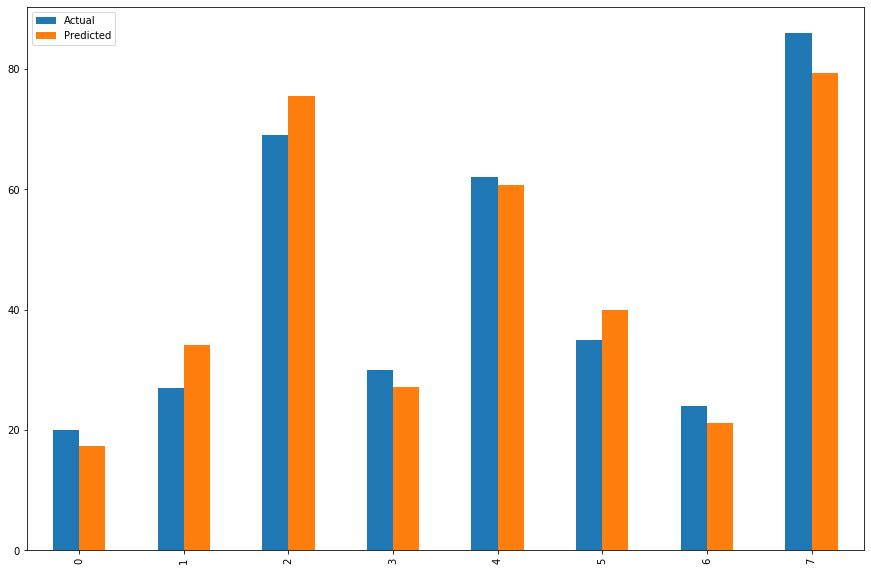

In [32]:
df1 = df
df1.plot(kind = "bar", figsize=(15,10))
plt.show()

<b>Making Own Prediction

In [35]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
prediction = regr.predict(hours)
print("No of Hours = ", hours[0][0])
print("Predicted Score = ", prediction[0])

No of Hours =  9.25
Predicted Score =  93.67656425238496


<b>Evaluating The Model

In [39]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print("R-squared:",regr.score(x,y))

Mean Absolute Error: 4.3393898065713135
Mean Squared Error: 23.059213548399548
R-squared: 0.9525818614293157
